<a href="https://colab.research.google.com/github/gunjanjoshi-0798/Zomato-unsupervisedML/blob/main/Copy_of_Zomato_Restaurant_Clustering_and_Sentiment_Analysis_by_Gunjan_Joshi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Zomato Restaurant Clustering and Sentiment Analysis.



##### **Project Type**    - Unsupervised
##### **Name**    - Gunjan Joshi


# **Project Summary -**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

There are two separate files, while the columns are self explanatory. Below is a brief description:

Restaurant names and Metadata - This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis Restaurant reviews - Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

Steps that are performed:

Importing libraries

Loading the dataset

Shape of dataset

Dataset information

Handling the duplicate values

Handling missing values

Understanding the columns

Variable description

Data wrangling

Data visualization

Story telling and experimenting with charts.

Text preprocessing

Latent Direchlet Allocation

Sentiment analysis

Challenges faced

Conclusion

# **GitHub Link -**

Zomato Restaurant Clustering and Sentiment Analysis by Gunjan Joshi.ipynb

# **Problem Statement**


The Project focuses on Customers and Company, you have to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from textblob import TextBlob
from IPython.display import Image
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess
import gensim

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [2]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
meta_df_main=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant names and Metadata.csv')
review_df=pd.read_csv('/content/drive/MyDrive/Zomato Restaurant reviews.csv')

### Dataset First View

In [4]:
# Dataset First Look
meta_df_main

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."
...,...,...,...,...,...,...
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)


In [5]:
meta_df_main.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
meta_df_main.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [7]:
review_df

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0
...,...,...,...,...,...,...,...
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0


### Dataset Rows & Columns count

In [8]:
# Meta Dataset Rows & Columns count
print(f"Number of rows: {len(meta_df_main.axes[0])}")
print(f"Number of columns: {len(meta_df_main.axes[1])}")

Number of rows: 105
Number of columns: 6


In [9]:
# Review Dataset Rows & Columns count
print(f"Number of rows: {len(review_df.axes[0])}")
print(f"Number of columns: {len(review_df.axes[1])}")

Number of rows: 10000
Number of columns: 7


### Dataset Information

In [10]:
# Dataset Info
meta_df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [11]:
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [12]:
# Dataset Duplicate Value Count
(meta_df_main.duplicated()).value_counts()

False    105
dtype: int64

In [13]:
(review_df.duplicated()).value_counts()

False    9964
True       36
dtype: int64

#### Missing Values/Null Values

In [14]:
# Missing Values/Null Values Count
meta_df_main.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

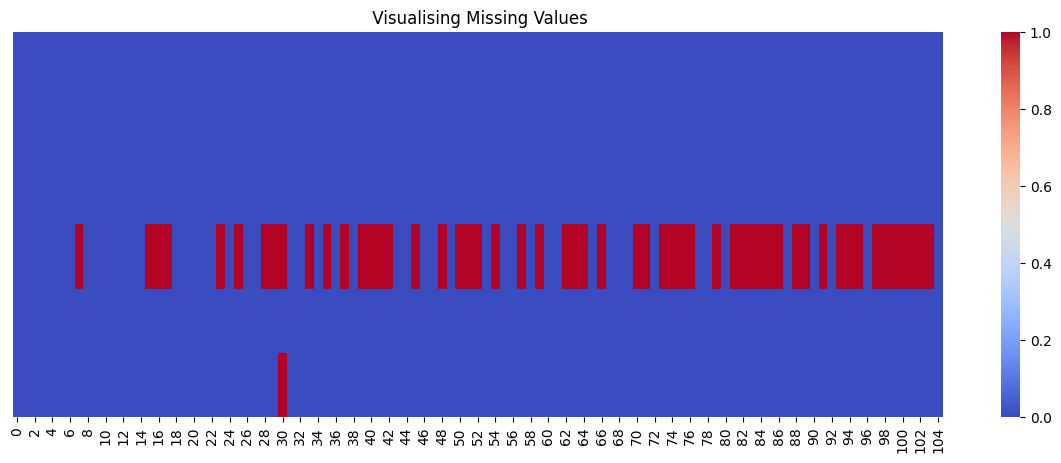

In [15]:
# Visualizing the missing values

plt.figure(figsize=(15,5))
sns.heatmap(meta_df_main.isnull().transpose(),cmap='coolwarm',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values");


### What did you know about your dataset?

Our data has missing values in collection column. Since the column contains sentiments hence no need to impute the null values.

1. There are 105 total observation with 6 different features.
2. Feature like collection and timing has null values.
3. There is no duplicate values i.e., 105 unique data.
4. Feature cost represent amount but has object data type because these values are separated by comma ','.
5. Timing represent operational hour but as it is represented in the form of text has object data type.

## ***2. Understanding Your Variables***

In [16]:
# Dataset Columns
meta_df_main.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

In [17]:
review_df.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [18]:
# Dataset Describe
meta_df_main.describe().T

,count,unique,top,freq
Name,105,105,Beyond Flavours,1
Links,105,105,https://www.zomato.com/hyderabad/beyond-flavou...,1
Cost,105,29,500,13
Collections,51,42,Food Hygiene Rated Restaurants in Hyderabad,4
Cuisines,105,92,"North Indian, Chinese",4
Timings,104,77,11 AM to 11 PM,6


### Variables Description

**Zomato Restaurant names and Metadata**

*   Name : Name of Restaurants
*   Links : URL Links of Restaurants
*   Cost : Per person estimated Cost of dining
*   Collection : Tagging of Restaurants w.r.t. Zomato categories
*   Cuisines : Cuisines served by Restaurants
*   Timings : Restaurant Timings

**Zomato Restaurant reviews**
*   Restaurant : Name of the Restaurant
*  Reviewer : Name of the Reviewer

* Review : Review Text

* Rating : Rating Provided by Reviewer

* MetaData : Reviewer Metadata - No. of Reviews and followers

* Time: Date and Time of Review

* Pictures : No. of pictures posted with review

### Check Unique Values for each variable.

In [19]:
# Check Unique Values for each variable.
pd.Series({col:meta_df_main[col].nunique() for col in meta_df_main})

Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [20]:
# Write your code to make your dataset analysis ready.
meta_df = meta_df_main.copy()

In [21]:
# Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'.
meta_df['Cost'] =  meta_df['Cost'].str.replace(",","").astype('int64')

In [22]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


### What all manipulations have you done and insights you found?

first I made the copy of the original dataframe so that any changes to dataframe doesn't affect the original dataframe. And then I changed the datatype of cost from object to int type.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

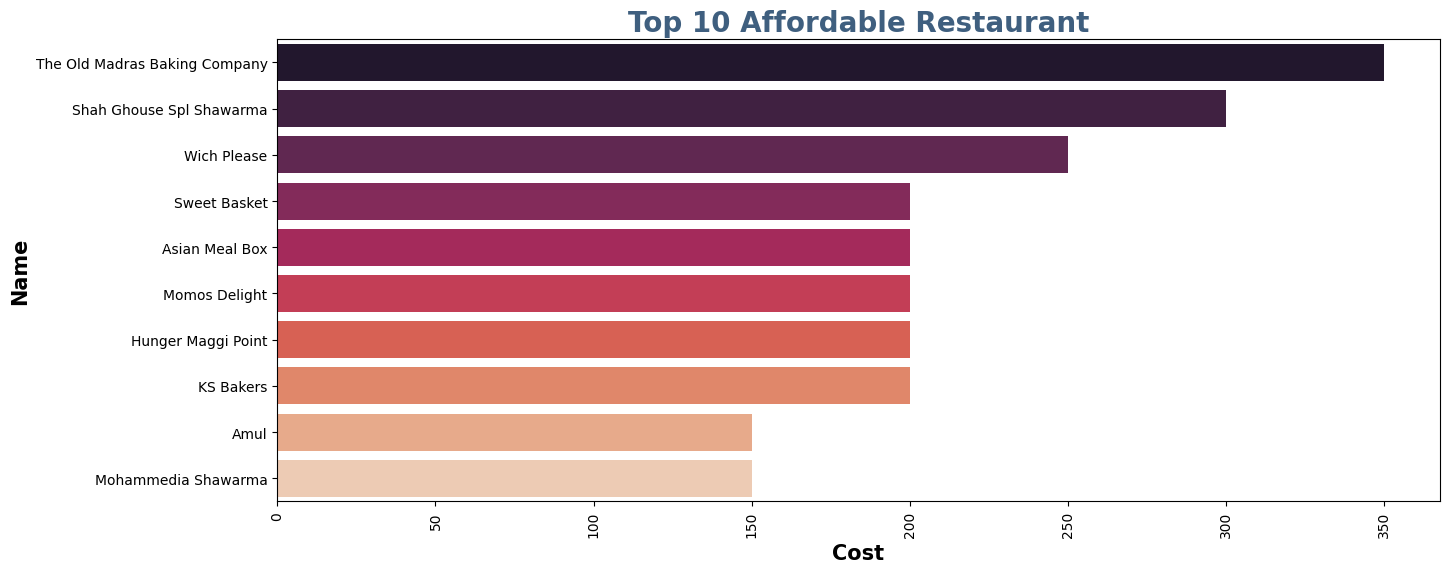

In [23]:
# Chart - 1 visualization code
# Affordable price restaurants.

plt.figure(figsize=(15,6))

# Performing groupby To get values accourding to Names and sort it for visualisation.
top_10_affor_rest=meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).tail(10)

# Lables for X and Y axis
x = top_10_affor_rest['Cost']
y = top_10_affor_rest['Name']

# Assigning the arguments for chart
plt.title("Top 10 Affordable Restaurant",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Cost",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='rocket')
plt.show()

The plot shows the top 10 affordable restaurants based on their total cost. The y-axis represents the restaurant names, while the x-axis shows the total cost. The affordable restaurants are sorted in ascending order of their cost.

#### Chart - 2

<Axes: >

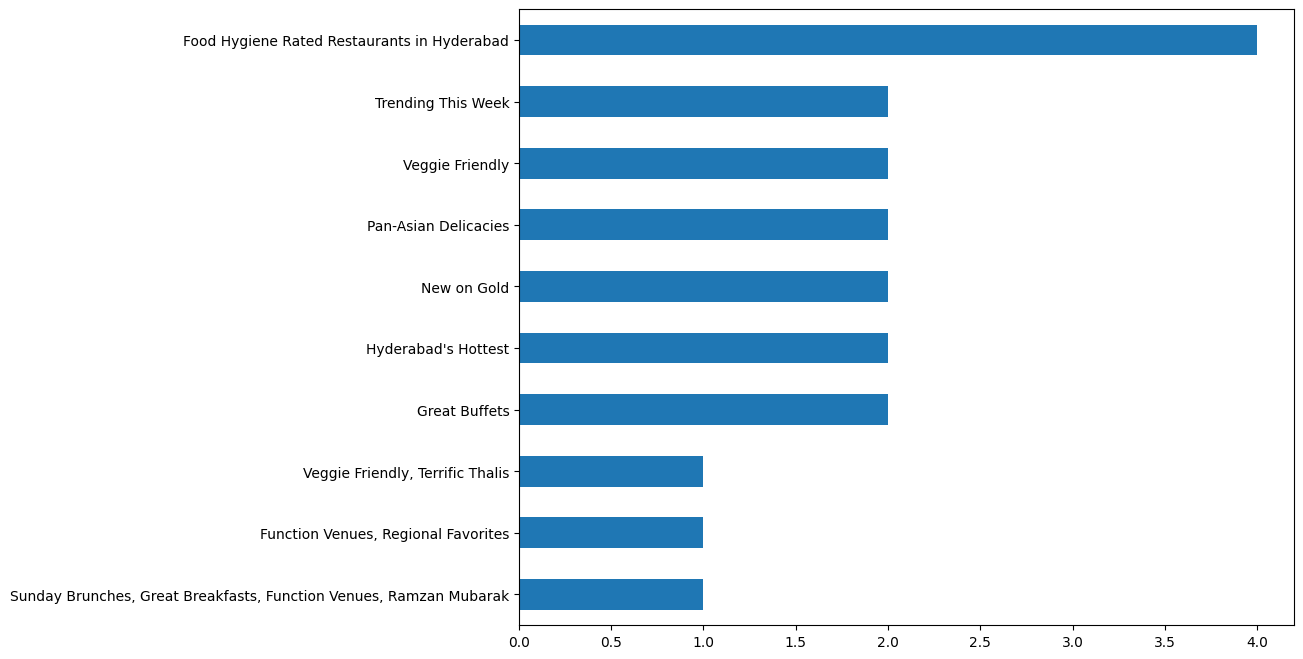

In [24]:
# Chart - 2 visualization code
# Visualisation the value counts of collection.
meta_df['Collections'].value_counts()[0:10].sort_values().plot(figsize=(10,8),kind='barh')

The resulting bar chart shows the top 10 most frequent values in the Collections column on the y-axis and their corresponding counts on the x-axis. The horizontal orientation of the bars makes it easy to compare the counts of the different collections. The longer the bar, the higher the count.

#### Chart - 3

In [25]:
# Chart - 3 visualization code

top10_res_by_cost = meta_df[['Name','Cost']].groupby('Name',as_index=False).sum().sort_values(by='Cost',ascending=False).head(10)

(-0.5, 1399.5, 1399.5, -0.5)

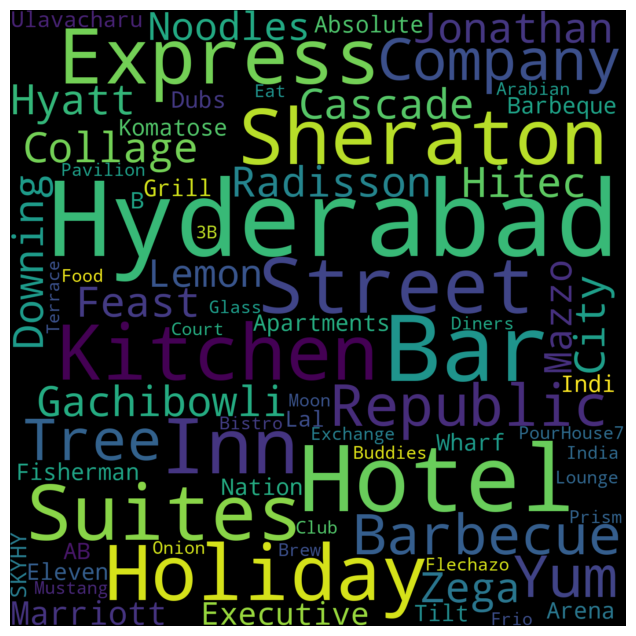

In [26]:
# Creating word cloud for expensive restaurants.
plt.figure(figsize=(15,8))
text = " ".join(name for name in meta_df.sort_values('Cost',ascending=False).Name[:30])

# Creating word_cloud with text as argument in .generate() method.
word_cloud = WordCloud(width = 1400, height = 1400,collocations = False, background_color = 'black').generate(text)

# Display the generated Word Cloud.
plt.imshow(word_cloud, interpolation='bilinear')

plt.axis("off")

# **Text preprocessing for the meta dataset.**

In Order to plot the cuisines from the data we have to count the frequency of the words from the document.(Frequency of cuisine). For that We have to perform the opration like removing stop words, Convert all the text into lower case, removing punctuations, removing repeated characters, removing Numbers and emojies and finally count vectorizer.

In [27]:
# Downloading and importing the dependancies for text cleaning.
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [28]:
# Extracting the stopwords from nltk library for English corpus.
sw = stopwords.words('english')

In [29]:
# Creating a function for removing stopwords.
def stopwords(text):
    '''a function for removing the stopword'''

    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in str(text).split() if word.lower() not in sw]

    # joining the list of words with space separator
    return " ".join(text)

In [30]:
# Removing stopwords from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda text: stopwords(text))
meta_df['Cuisines'].head()

0    chinese, continental, kebab, european, south i...
1                       biryani, north indian, chinese
2         asian, mediterranean, north indian, desserts
3    biryani, north indian, chinese, seafood, bever...
4    asian, continental, north indian, chinese, med...
Name: Cuisines, dtype: object

In [31]:
# Defining the function for removing punctuation.
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string

    # replacing the punctuations with no space,
    # which in effect deletes the punctuation marks
    translator = str.maketrans('', '', string.punctuation)

    # return the text stripped of punctuation marks
    return text.translate(translator)

In [32]:
# Removing punctuation from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: remove_punctuation(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [33]:
# Cleaning and removing Numbers.
import re

# Writing a function to remove repeating characters.
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)

In [34]:
# Removing repeating characters from Cuisines.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_repeating_char(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [35]:
# Removing the Numbers from the data.
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)

In [36]:
# Implementing the cleaning.
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: cleaning_numbers(x))
meta_df['Cuisines'].head()

0    chinese continental kebab european south india...
1                         biryani north indian chinese
2            asian mediterranean north indian desserts
3       biryani north indian chinese seafood beverages
4    asian continental north indian chinese mediter...
Name: Cuisines, dtype: object

In [37]:
# Top 20 Two word Frequencies of Cuisines.
from collections import Counter
text = ' '.join(meta_df['Cuisines'])

# separating each word from the sentences
words = text.split()

# Extracting the first word from the number for cuisines in the sentence.
two_words = {' '.join(words):n for words,n in Counter(zip(words, words[1:])).items() if not  words[0][-1]==(',')}

In [38]:
# Extracting the most frequent cuisine present in the collection.
# Counting a frequency for cuisines.
two_words_dfc = pd.DataFrame(two_words.items(), columns=['Cuisine', 'Frequency'])

# Sorting the most frequent cuisine at the top and order by descending
two_words_dfc = two_words_dfc.sort_values(by = "Frequency", ascending = False)

# selecting first top 20 frequent cuisine.
two_words_20c = two_words_dfc[:20]
two_words_20c

,Cuisine,Frequency
6,north indian,61
9,indian chinese,27
42,fast food,15
4,south indian,9
5,indian north,9
33,chinese north,8
24,indian continental,6
65,italian north,6
8,biryani north,6
28,food north,6


#### Chart - 4

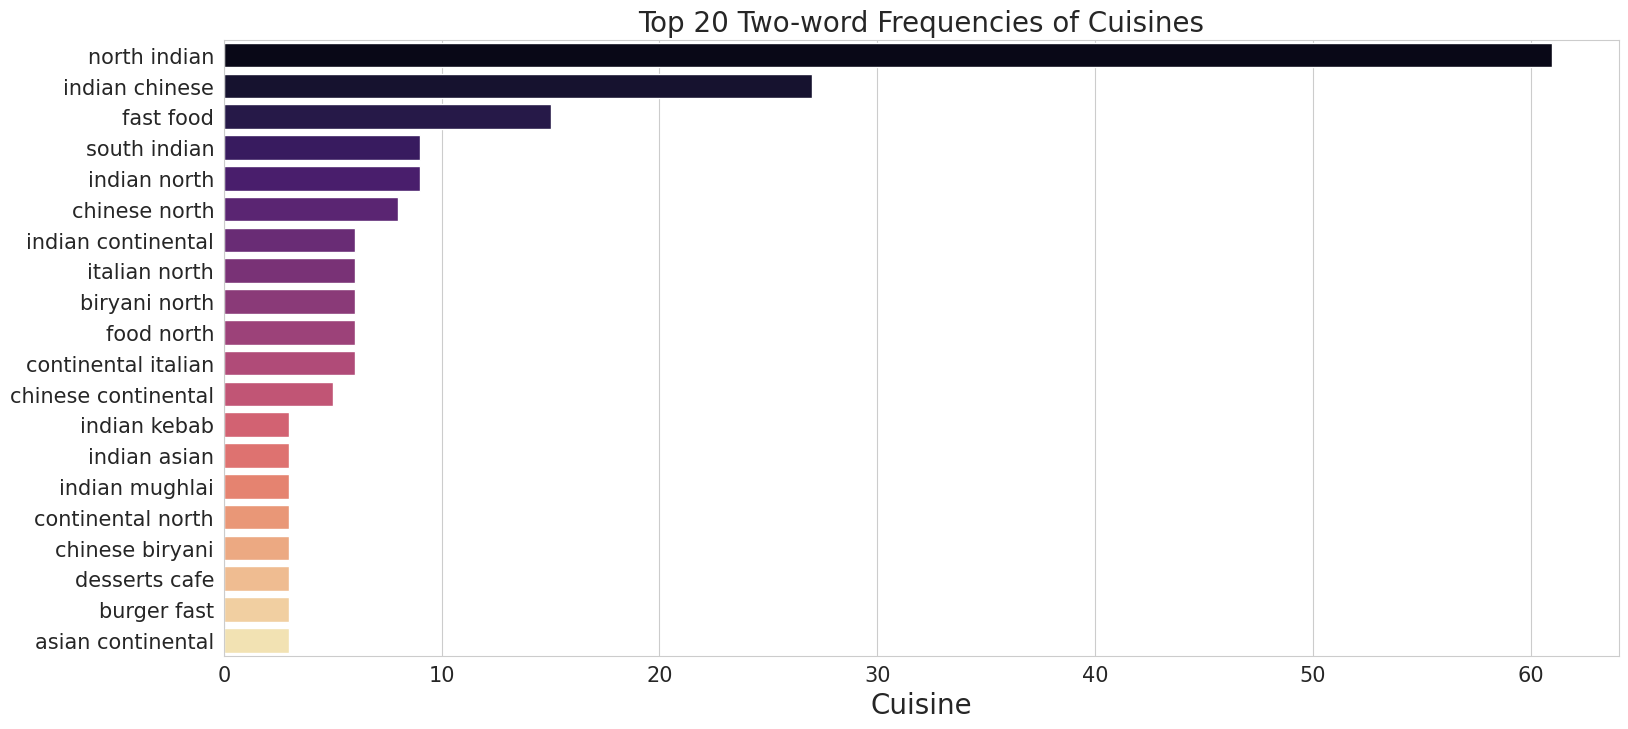

In [39]:
# Chart - 4 visualization code

# Visualizing the frequency of the Cuisines.

sns.set_style("whitegrid")
plt.figure(figsize = (18, 8))
sns.barplot(y = "Cuisine", x = "Frequency", data = two_words_20c, palette = "magma")
plt.title("Top 20 Two-word Frequencies of Cuisines", size = 20)
plt.xticks(size = 15)
plt.yticks(size = 15)
plt.xlabel("Cuisine", size = 20)
plt.ylabel(None)
plt.savefig("Top_20_Two-word_Frequencies_of_Cuisines.png")
plt.show()


The DataFrame contains two columns: "Cuisine" and "Frequency." The "Cuisine" column lists the most frequent two-word cuisine terms, while the "Frequency" column shows the number of times each two-word cuisine term appears in the dataset.This information can be helpful in understanding the most common cuisine types in the dataset. It can also be used to identify trends and patterns in the types of cuisines that are popular or in demand among the customers.

In [40]:
# proportion or percentage of occurrences for each unique value in the Rating column.
review_df['Rating'].value_counts(normalize=True)

5       0.384662
4       0.238205
1       0.174162
3       0.119755
2       0.068661
4.5     0.006926
3.5     0.004718
2.5     0.001907
1.5     0.000903
Like    0.000100
Name: Rating, dtype: float64

In [41]:
# Removing like value and taking the mean in the rating column.
review_df.loc[review_df['Rating'] == 'Like'] = np.nan

 # Chenging the data type of rating column
review_df['Rating']= review_df['Rating'].astype('float64')

print(review_df['Rating'].mean())

3.601044071880333


In [42]:
# Filling mean in place of null value
review_df['Rating'].fillna(3.6, inplace=True)

In [43]:
# Changing the data type of review column.
review_df['Review'] = review_df['Review'].astype(str)

# Creating a review_length column to check the frequency of each rating.
review_df['Review_length'] = review_df['Review'].apply(len)

In [44]:
review_df['Rating'].value_counts(normalize=True)

5.0    0.3832
4.0    0.2373
1.0    0.1735
3.0    0.1193
2.0    0.0684
4.5    0.0069
3.5    0.0047
3.6    0.0039
2.5    0.0019
1.5    0.0009
Name: Rating, dtype: float64

The Ratings distribution 38% reviews are 5 rated,23% are 4 rated stating that people do rate good food high.

In [45]:
# split metadata column into 2 columns i.e. Reviews and followers
review_df['Reviews'],review_df['Followers']= review_df['Metadata'].str.split(',').str
review_df['Reviews'] = pd.to_numeric(review_df['Reviews'].str.split(' ').str[0])

In [46]:
review_df['Followers']= pd.to_numeric(review_df['Followers'].str.split(' ').str[1])

In [47]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Review_length,Reviews,Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",5/25/2019 15:54,0.0,222,1.0,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",5/25/2019 14:20,0.0,144,3.0,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",5/24/2019 22:54,0.0,189,2.0,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",5/24/2019 22:11,0.0,148,1.0,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",5/24/2019 21:37,0.0,160,3.0,2.0


In [48]:
# Converting Time column into Time, Year, Month, Hour
review_df['Time']=pd.to_datetime(review_df['Time'])
review_df['Year'] = pd.DatetimeIndex(review_df['Time']).year
review_df['Month'] = pd.DatetimeIndex(review_df['Time']).month
review_df['Hour'] = pd.DatetimeIndex(review_df['Time']).hour
review_df = review_df.drop(['Metadata'], axis =1)

In [49]:
review_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Review_length,Reviews,Followers,Year,Month,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0.0,222,1.0,2.0,2019.0,5.0,15.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0.0,144,3.0,2.0,2019.0,5.0,14.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0.0,189,2.0,3.0,2019.0,5.0,22.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0.0,148,1.0,1.0,2019.0,5.0,22.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0.0,160,3.0,2.0,2019.0,5.0,21.0


In [50]:
review_df.isnull().sum()

Restaurant          1
Reviewer           39
Review              0
Rating              0
Time               39
Pictures            1
Review_length       0
Reviews            39
Followers        1617
Year               39
Month              39
Hour               39
dtype: int64

In [51]:
# Replacing followers and reviews null values into 0
review_df['Followers'].fillna(0,inplace=True)
review_df['Reviews'].fillna(0,inplace=True)

In [52]:
# we can drop the remaining missing data
review_df.dropna(inplace=True)

In [53]:
review_df.reset_index(inplace = True)

In [54]:
review_df.isnull().sum()

index            0
Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Review_length    0
Reviews          0
Followers        0
Year             0
Month            0
Hour             0
dtype: int64

#### Chart - 5

Text(0.5, 0, 'Ratings')

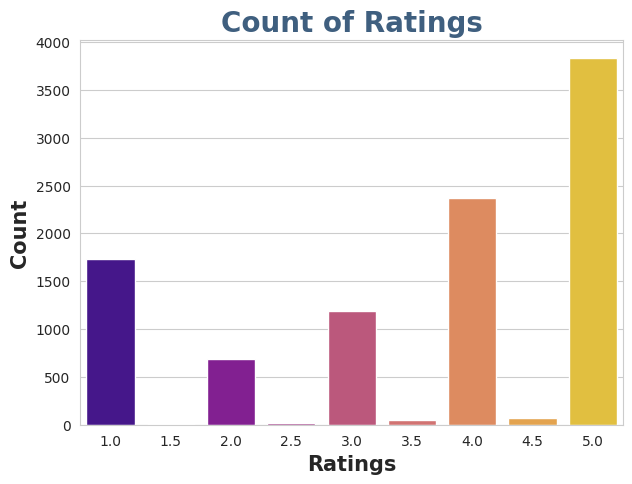

In [55]:
# Chart - 5 visualization code

# Countplot of Ratings
plt.figure(figsize=(7,5))
sns.countplot(x= review_df['Rating'],palette="plasma")
plt.title("Count of Ratings",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=-.75)[-3])
plt.ylabel("Count",weight='bold',fontsize=15)
plt.xlabel("Ratings",weight='bold',fontsize=15)

The bar plot confirms that maximum rating given is 5.

#### Chart - 6

<Axes: xlabel='Time', ylabel='Count'>

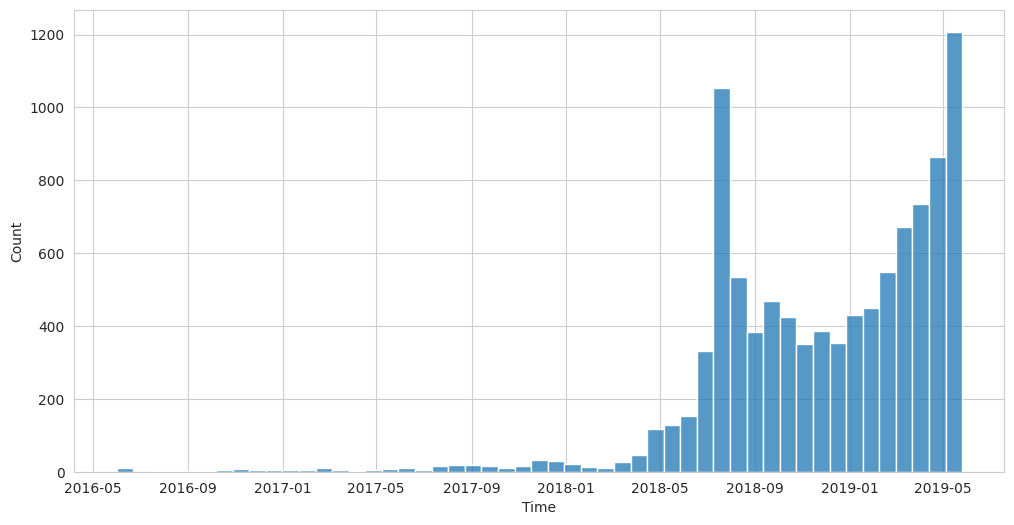

In [56]:
# Chart - 6 visualization code
plt.figure(figsize=(12,6))
sns.histplot(review_df.Time)

<Axes: xlabel='Month', ylabel='count'>

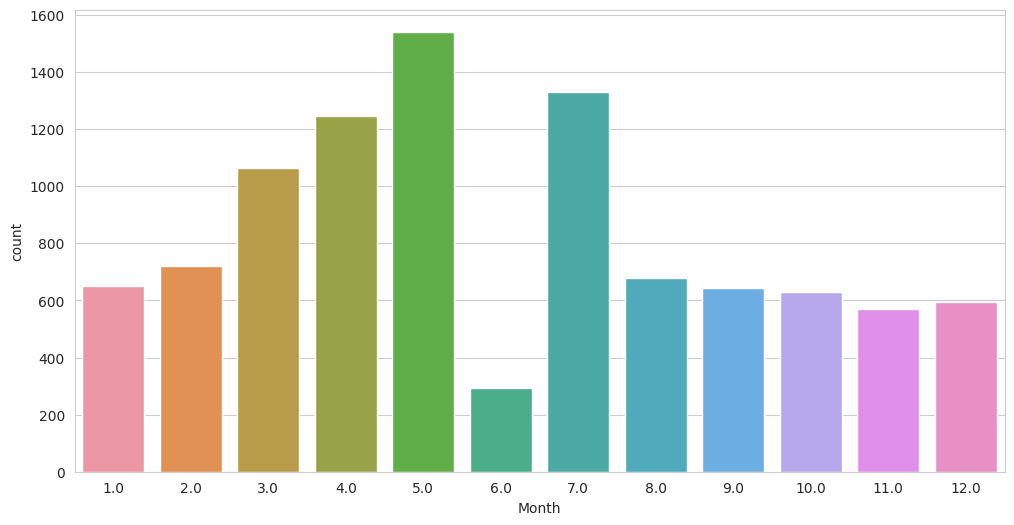

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(x= review_df.Month)

In [58]:
# Importing dependancies and removing stopwords.

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Creating argument for stop words.
stop_words = stopwords.words('english')

print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [60]:
rest_word=['order','restaurant','taste','ordered','good','food','table','place','one','also']
rest_word

['order',
 'restaurant',
 'taste',
 'ordered',
 'good',
 'food',
 'table',
 'place',
 'one',
 'also']

#### Chart - 7

In [61]:
# Chart - 7 visualization code

# We will extrapolate the 15 profiles that have made more reviews.

# Groupby on the basis of rivewer gives the fequency of the reviews
reviewer_list = review_df.groupby('Reviewer').apply(lambda x: x['Reviewer'].count()).reset_index(name='Review_Count')

 # Sorting the frequency of reviews decending
reviewer_list = reviewer_list.sort_values(by = 'Review_Count',ascending=False)

# Selecting the top 15 reviewrs
top_reviewers = reviewer_list[:15]

Text(0, 0.5, 'No of reviews')

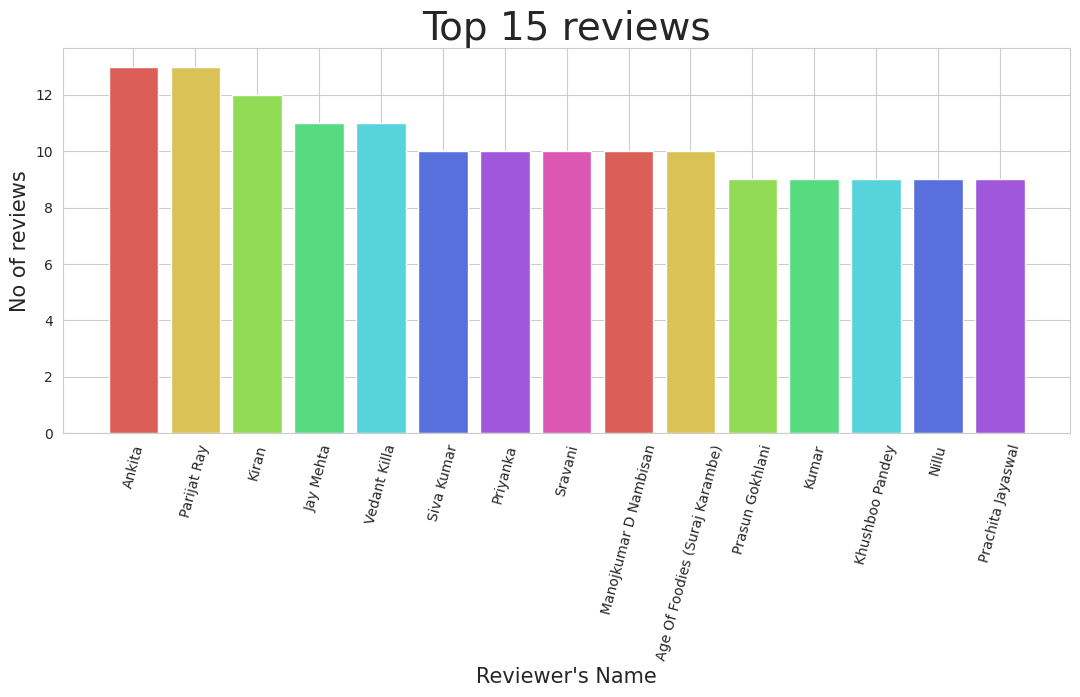

In [62]:
# Visualizing the top 15 reviewers.
plt.figure(figsize=(13,5))
plt.bar(top_reviewers['Reviewer'], top_reviewers['Review_Count'], color = sns.color_palette("hls", 8))
plt.xticks(rotation=75)
plt.title('Top 15 reviews',size=28)
plt.xlabel("Reviewer's Name",size=15)
plt.ylabel('No of reviews',size=15)

#### Chart - 8

In [63]:
# Chart - 8 visualization code
# Calculate the average of their ratings review.
review_ratings=review_df.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average_Ratings')
review_ratings=pd.merge(top_reviewers,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers_ratings=review_ratings[:15].sort_values(by = 'Average_Ratings',ascending=False)

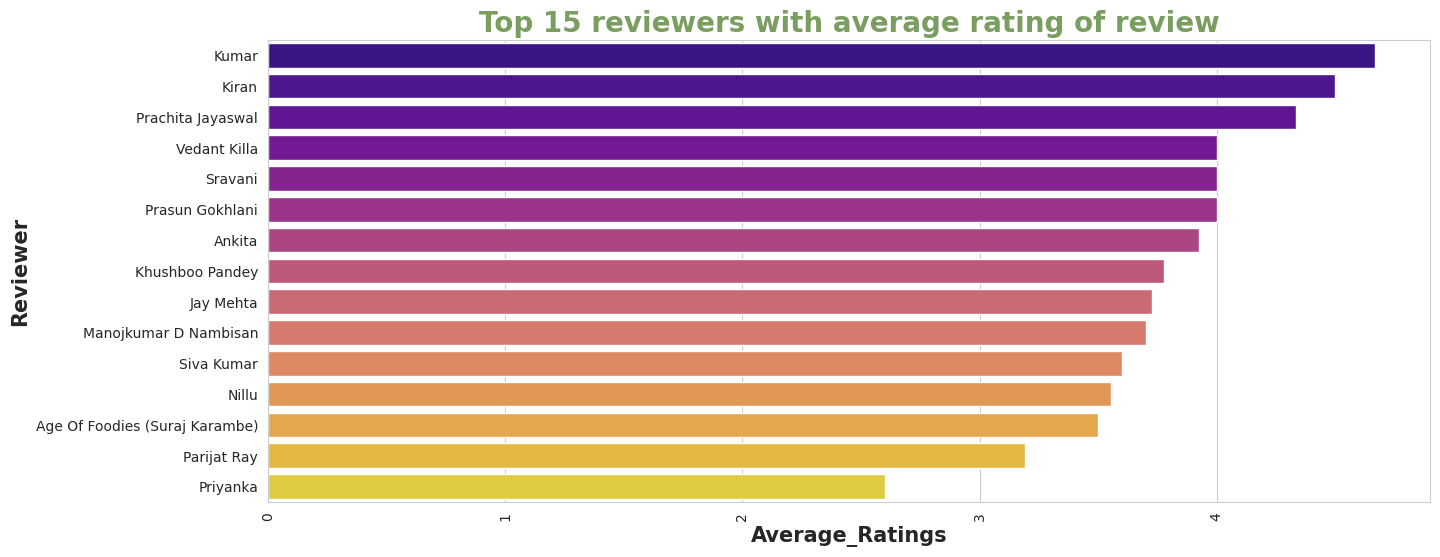

In [64]:
# Average rating of top reviewers.
plt.figure(figsize=(15,6))
x = top_reviewers_ratings['Average_Ratings']
y = top_reviewers_ratings['Reviewer']
plt.title("Top 15 reviewers with average rating of review",fontsize=20, weight='bold',color=sns.cubehelix_palette(8, start=.5, rot=90)[-5])
plt.ylabel("Name",weight='bold',fontsize=15)
plt.xlabel("Average Ratings",weight='bold',fontsize=15)
plt.xticks(rotation=90)
sns.barplot(x=x, y=y,palette='plasma')
plt.show()

The output of top 15 reviewers based on the number of reviews they have made in a given dataset. Analyzing the reviews made by these top reviewers can help in improving customer satisfaction and loyalty, ultimately leading to increased revenue and growth.

#### Chart - 9

In [65]:
# Chart - 9 visualization code
review= review_df.Review
review

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9956    Madhumathi Mahajan Well to start with nice cou...
9957    This place has never disappointed us.. The foo...
9958    Bad rating is mainly because of "Chicken Bone ...
9959    I personally love and prefer Chinese Food. Had...
9960    Checked in here to try some delicious chinese ...
Name: Review, Length: 9961, dtype: object

In [66]:
review_df['Review'] = review_df['Review'].apply(remove_punctuation)

In [67]:
review_df['Review'] = review_df['Review'].apply(stopwords)

In [68]:
review=review_df.Review
review

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9956    madhumathi mahajan well start nice courteous s...
9957    place never disappointed us food courteous sta...
9958    bad rating mainly chicken bone found veg food ...
9959    personally love prefer chinese food couple tim...
9960    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9961, dtype: object

In [69]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [70]:
def lemmatization_(text):
  for index,x in enumerate(text):
    doc = nlp(x)
    l=list()
    for word in doc:
        l.append(word.lemma_)
    text[index]=' '.join(l)
  return text

In [71]:
# remove_all_extra_spaces
def remove_spaces (text):
  '''removes all extra space from the text
  '''
  for index,x in enumerate(text):
    text[index]=" ".join(x.split())
  return text

In [72]:
review=remove_spaces(review)

In [73]:
# Remove non letters
import re
regex = re.compile('[^a-zA-Z]')
def remove_non_leters(text):
  '''used to remove all non leters form the list
  '''
  text=[regex.sub(' ', x) for x in text]
  return text

In [74]:
review=remove_non_leters(review)

In [75]:
# storing the reviews in a feature of df
review_df['Review'] = review
review_df.head()

,index,Restaurant,Reviewer,Review,Rating,Time,Pictures,Review_length,Reviews,Followers,Year,Month,Hour
0,0,Beyond Flavours,Rusha Chakraborty,ambience good food quite good saturday lunch c...,5.0,2019-05-25 15:54:00,0.0,222,1.0,2.0,2019.0,5.0,15.0
1,1,Beyond Flavours,Anusha Tirumalaneedi,ambience good pleasant evening service prompt ...,5.0,2019-05-25 14:20:00,0.0,144,3.0,2.0,2019.0,5.0,14.0
2,2,Beyond Flavours,Ashok Shekhawat,must try great food great ambience thnx servic...,5.0,2019-05-24 22:54:00,0.0,189,2.0,3.0,2019.0,5.0,22.0
3,3,Beyond Flavours,Swapnil Sarkar,soumen das arun great guy behavior sincerety g...,5.0,2019-05-24 22:11:00,0.0,148,1.0,1.0,2019.0,5.0,22.0
4,4,Beyond Flavours,Dileep,food goodwe ordered kodi drumsticks basket mut...,5.0,2019-05-24 21:37:00,0.0,160,3.0,2.0,2019.0,5.0,21.0


In [76]:
#function to removing words greater than 45 and less than 2
def len_less_than2(review):
  review=" ".join([i for i in review.split() if len(i)>2])
  review=" ".join([i for i in review.split() if len(i)<=45])
  return review

In [77]:
#removing words greater than 45 and less than 2
review_df['Review']=review_df['Review'].apply(lambda x:len_less_than2(x))

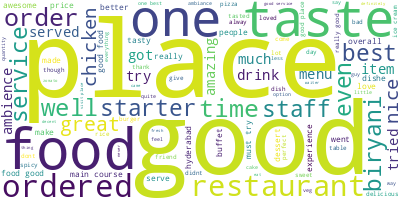

In [78]:
# Word cloud for positive reviews.

from wordcloud import WordCloud
review_df['Review']=review_df['Review'].astype(str)

ps = PorterStemmer()
review_df['Review']=review_df['Review'].map(lambda x: ps.stem(x))
long_string = ','.join(list(review_df['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

#### Chart - 10

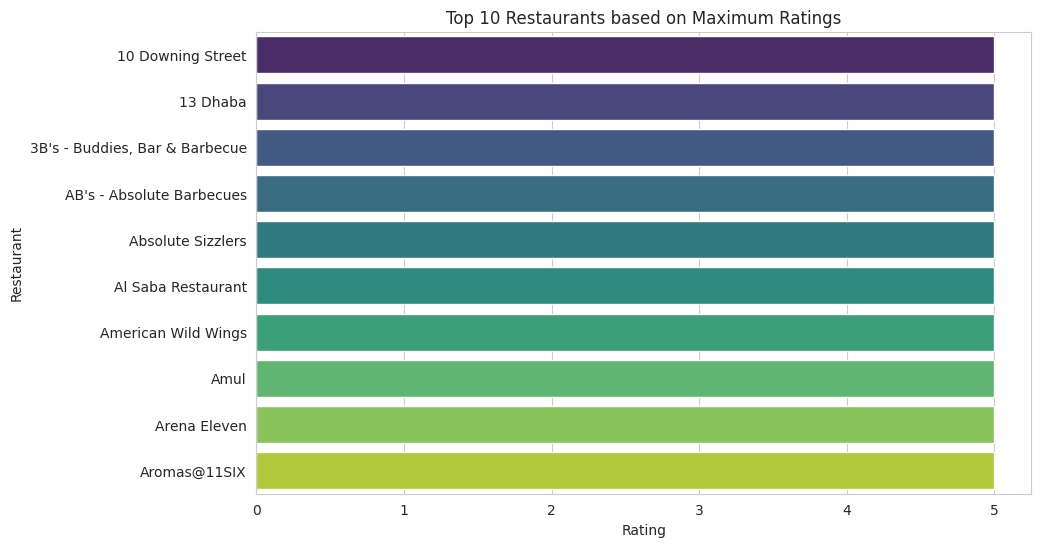

In [79]:
# Chart - 10 visualization code
top10_rated = review_df.groupby("Restaurant")["Rating"].max().nlargest(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top10_rated.values, y=top10_rated.index, palette='viridis')
plt.xlabel('Rating')
plt.ylabel('Restaurant')
plt.title('Top 10 Restaurants based on Maximum Ratings')
plt.show()

By employing the barplot visualization, I have successfully identified and displayed the top-rated restaurants, offering a clear and concise view of the dining establishments that have received the highest accolades and positive feedback from customers. Among them, 10 Downing Street, 13 Dhaba, and Barbeque Nation emerge as the most highly rated choices.

#### Chart - 11

In [80]:
# Chart - 11 visualization code
# Creating two datasets for positive and negative reviews.

review_df['Rating']= pd.to_numeric(review_df['Rating'],errors='coerce')   # The to_numeric() function in pandas is used to convert a pandas object to a numeric type.
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

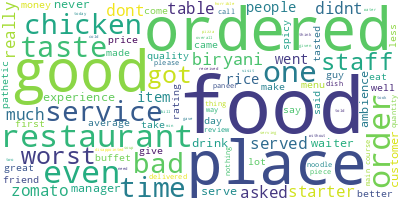

In [81]:
# Negative reviews wordcloud.

long_string = ','.join(list(neg_rev['Review'].values))
long_string
wordcloud = WordCloud(background_color="white", max_words=100, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

# Create a corpus of words from the negative reviews in the neg_rev DataFrame.

In [82]:
# Creating word embeddings and t-SNE plot. (for positive and negative reviews).

from gensim.models import word2vec
pos_rev = review_df[review_df.Rating>= 3]
neg_rev = review_df[review_df.Rating< 3]

Dataframe where the Rating column is greater than or equal to 3. This selects all the positive reviews where as the Rating column is less than 3. This selects all the negative reviews, assuming that the Rating column is a scale from 1 to 5 with 5 being the highest rating.

In [83]:
# Plot for negative reviews.
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(neg_rev)
corpus[0:2]

[['ordered',
  'corn',
  'cheese',
  'balls',
  'manchow',
  'soup',
  'paneer',
  'shashlik',
  'sizzler',
  'sizzler',
  'stale',
  'paneer',
  'smelling',
  'waiter',
  'impolite',
  'even',
  'accept',
  'mistake',
  'never',
  'go'],
 ['went',
  'team',
  'lunch',
  'worst',
  'restaurant',
  'food',
  'tasteless',
  'service',
  'slow',
  'working',
  'requested',
  'multiple',
  'times',
  'use',
  'please',
  'don',
  'waste',
  'money',
  'strictly',
  'recommend',
  'prefer',
  'beyond',
  'flavour']]

**Create a corpus of words from the positive reviews in the neg_rev DataFrame.**

In [84]:
# Plot for postive reviews
def build_corpus(data):
    "Creates a list of lists containing words from each sentence"
    corpus = []
    for col in ['Review']:
        for sentence in data[col].iteritems():
            word_list = sentence[1].split(" ")
            corpus.append(word_list)

    return corpus

# Display the first two elements of the corpus list
corpus = build_corpus(pos_rev)
corpus[0:2]

[['ambience',
  'good',
  'food',
  'quite',
  'good',
  'saturday',
  'lunch',
  'cost',
  'effective',
  'good',
  'place',
  'sate',
  'brunch',
  'one',
  'also',
  'chill',
  'friends',
  'parents',
  'waiter',
  'soumen',
  'das',
  'really',
  'courteous',
  'help'],
 ['ambience',
  'good',
  'pleasant',
  'evening',
  'service',
  'prompt',
  'food',
  'good',
  'good',
  'experience',
  'soumen',
  'das',
  'kudos',
  'servic']]

In [85]:
# Checking for the implimented code
review_df['Review']

0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9956    madhumathi mahajan well start nice courteous s...
9957    place never disappointed food courteous staff ...
9958    bad rating mainly chicken bone found veg food ...
9959    personally love prefer chinese food couple tim...
9960    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9961, dtype: object

## ***LDA***

In [86]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.utils import simple_preprocess

In [87]:
# Assume that documents is a list of strings representing text documents

# Tokenize the documents
tokenized_docs = [simple_preprocess(doc) for doc in review_df['Review']]

# Create a dictionary from the tokenized documents
dictionary = corpora.Dictionary(tokenized_docs)

# Convert the tokenized documents to a bag-of-words corpus
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Train an LDA model on the bag-of-words corpus
num_topics = 10  # The number of topics to extract
lda_model = LdaModel(bow_corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Print the topics and their top 10 terms
for topic in lda_model.show_topics(num_topics=num_topics, num_words=10, formatted=False):
    print('Topic {}: {}'.format(topic[0], ', '.join([term[0] for term in topic[1]])))

Topic 0: paratha, paneer, parathas, aloo, brownies, old, chutney, butter, punjabi, momo
Topic 1: pork, excellent, super, thanks, thank, shakes, ribs, environment, club, man
Topic 2: chicken, ordered, good, taste, place, one, rice, like, biryani, try
Topic 3: food, restaurant, service, place, zomato, experience, staff, menu, one, time
Topic 4: place, even, service, time, one, table, get, asked, dont, order
Topic 5: good, place, food, service, ambience, great, nice, visit, staff, best
Topic 6: biryani, food, order, ordered, bad, worst, delivery, dont, quality, delivered
Topic 7: coffee, chocolate, ice, cafe, cream, cake, tea, cupcakes, total, guest
Topic 8: good, food, veg, taste, starters, buffet, main, course, quantity, indian
Topic 9: haleem, salads, kaju, excel, dlf, nan, meetha, serv, delightful, superb


In [88]:
pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 19.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 42.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 24.4 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicor

In [89]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
#import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

In [90]:
docs_raw = review_df['Review'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [91]:
#Transform text to vector form using the vectorizer object
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{10,}\b', # num chars > 3 to avoid some meaningless words
                                max_df = 0.9,                        # discard words that appear in > 90% of the reviews
                                min_df = 10)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
#apply transformation
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [93]:
dtm_tfidf = tfidf_vectorizer.fit_transform(docs_raw)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [94]:
print("The shape of the tfidf is {}, meaning that there are {} {} and {} tokens made through the filtering process.".\
              format(dtm_tfidf.shape,dtm_tfidf.shape[0], review_df['Review'], dtm_tfidf.shape[1]))

The shape of the tfidf is (9961, 165), meaning that there are 9961 0       ambience good food quite good saturday lunch c...
1       ambience good pleasant evening service prompt ...
2       must try great food great ambience thnx servic...
3       soumen das arun great guy behavior sincerety g...
4       food goodwe ordered kodi drumsticks basket mut...
                              ...                        
9956    madhumathi mahajan well start nice courteous s...
9957    place never disappointed food courteous staff ...
9958    bad rating mainly chicken bone found veg food ...
9959    personally love prefer chinese food couple tim...
9960    checked try delicious chinese food seen nonveg...
Name: Review, Length: 9961, dtype: object and 165 tokens made through the filtering process.


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [95]:
# Define Search Param
search_params = {'n_components': [5, 10, 15, 20, 25, 30], 'learning_decay': [.5, .7, .9]}

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [96]:
# Init the Model
lda = LatentDirichletAllocation()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [97]:
model = GridSearchCV(lda, param_grid=search_params)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [98]:
model.fit(dtm_tfidf)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


GridSearchCV(estimator=LatentDirichletAllocation(),
             param_grid={'learning_decay': [0.5, 0.7, 0.9],
                         'n_components': [5, 10, 15, 20, 25, 30]})

In [99]:
best_lda_model = model.best_estimator_

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The topics and topic terms can be visualised to help assess how interpretable the topic model is

# Sentiment Analysis

In [100]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import plotly.express as px

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [101]:
# Create a function to get the subjectivity
def subjectivity(text):
    return TextBlob(text).sentiment.subjectivity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [102]:
# Create a function to get the polarity
def polarity(text):
    return TextBlob(text).sentiment.polarity

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [103]:
# Applying subjectivity and the polarity function to the respective columns
review_df['Subjectivity'] = review_df['Review'].apply(subjectivity)
review_df['Polarity'] = review_df['Review'].apply(polarity)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [104]:
# Checking for created columns
review_df['Polarity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       0.660000
1       0.708333
2       0.533333
3       0.750000
4       0.525000
          ...   
9956    0.313021
9957    0.174621
9958    0.133355
9959    0.583333
9960    0.103030
Name: Polarity, Length: 9961, dtype: float64

In [105]:
# Checking for created columns
review_df['Subjectivity']

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0       0.720000
1       0.691667
2       0.600000
3       0.675000
4       0.525000
          ...   
9956    0.642708
9957    0.710606
9958    0.511876
9959    0.616667
9960    0.630303
Name: Subjectivity, Length: 9961, dtype: float64

In [106]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


If the score is less than 0, the function returns the string 'Negative'. If the score is equal to 0, the function returns the string 'Neutral'. If the score is greater than 0, the function returns the string 'Positive'.

In [107]:
# Apply get analysis function to separate the sentiments from the column
review_df['Analysis'] = review_df['Polarity'].apply(getAnalysis)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [108]:
# plot the polarity and subjectivity
fig = px.scatter(review_df,
                 x='Polarity',
                 y='Subjectivity',
                 color = 'Analysis',
                 size='Subjectivity')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [109]:
# Add a vertical line at x=0 for Netural Reviews
fig.update_layout(title='Sentiment Analysis',
                  shapes=[dict(type= 'line',
                               yref= 'paper', y0= 0, y1= 1,
                               xref= 'x', x0= 0, x1= 0)])
fig.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



The resulting plot can provide several insights into the sentiment analysis results. Firstly, the histogram bars on the left side of the plot (negative polarity) indicate that a significant number of reviews expressed negative sentiments. Similarly, the histogram bars on the right side of the plot (positive polarity) indicate that a significant number of reviews expressed positive sentiments.

Overall, this plot can provide a quick and easy way to visualize the sentiment polarity distribution of the reviews, which can help in understanding the overall sentiment of the customers towards the restaurants.

# Clustering Analysis

In [110]:
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning);

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [111]:
# converting the cuisines to lower case

meta_df_main['Cuisines'] = meta_df_main['Cuisines'].apply(lambda x : x.lower())

In [112]:
# Separating the Name, cost and cuisines column.
cuisine_df = meta_df_main.loc[:,['Name','Cost','Cuisines']]

In [113]:
# Overview of separated variables.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,"1,300","asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","asian, continental, north indian, chinese, med..."


In [114]:
# Removing spces from cuisine column.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.replace(' ','')

# Spliting the Words in cuisine.
cuisine_df['Cuisines'] = cuisine_df['Cuisines'].str.split(',')

In [115]:
# Overview on text cleaning.
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"[chinese, continental, kebab, european, southi..."
1,Paradise,800,"[biryani, northindian, chinese]"
2,Flechazo,"1,300","[asian, mediterranean, northindian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"[biryani, northindian, chinese, seafood, bever..."
4,Over The Moon Brew Company,"1,200","[asian, continental, northindian, chinese, med..."


In [116]:
from sklearn.preprocessing import MultiLabelBinarizer

# converting a list of labels for each sample into a binary indicator matrix
mlb = MultiLabelBinarizer(sparse_output=True)

In [117]:
# converting the Cuisines column in the cuisine_df DataFrame into a binary indicator matrix.
cuisine_df = cuisine_df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(cuisine_df.pop('Cuisines')),
                                                               index=cuisine_df.index, columns=mlb.classes_))

In [118]:
# Overview
cuisine_df.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,northindian,pizza,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
1,Paradise,800,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,1,0,0,1,0,0,0,0,0,0
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [119]:
# Checking the unique for rating.
review_df['Rating'].unique()

array([5. , 4. , 1. , 3. , 2. , 3.5, 4.5, 2.5, 1.5])

In [120]:
# Remove nan rating in Rating column.
review_df.dropna(subset=['Rating'],inplace=True)

In [121]:
# Change data type of rating column to float.
review_df['Rating']= review_df['Rating'].astype('float')

In [122]:
# Dropping the null Values from review column.
review_df.dropna(subset =['Review'], inplace=True)

In [123]:
# Grouping the restaurant on the basis of average rating.
ratings_df = review_df.groupby('Restaurant')['Rating'].mean().reset_index()

In [124]:
# Top highly rated 15 restaurants.
ratings_df .sort_values(by='Rating',ascending = False).head(15)

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.880
11,B-Dubs,4.810
2,"3B's - Buddies, Bar & Barbecue",4.760
67,Paradise,4.700
35,Flechazo,4.660
87,The Indi Grill,4.600
97,Zega - Sheraton Hyderabad Hotel,4.450
64,Over The Moon Brew Company,4.340
16,Beyond Flavours,4.280
19,Cascade - Radisson Hyderabad Hitec City,4.260


In [125]:
#  Combining the information on restaurant cuisine and ratings into a single DataFrame.
df_cluster = cuisine_df.merge(ratings_df, left_on='Name',right_on='Restaurant')

In [126]:
# Overview
df_cluster.head()

,Name,Cost,american,andhra,arabian,asian,bakery,bbq,beverages,biryani,...,salad,seafood,southindian,spanish,streetfood,sushi,thai,wraps,Restaurant,Rating
0,Beyond Flavours,800,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,Beyond Flavours,4.28
1,Paradise,800,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,Paradise,4.70
2,Flechazo,"1,300",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Flechazo,4.66
3,Shah Ghouse Hotel & Restaurant,800,0,0,0,0,0,0,1,1,...,0,1,0,0,0,0,0,0,Shah Ghouse Hotel & Restaurant,3.21
4,Over The Moon Brew Company,"1,200",0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,Over The Moon Brew Company,4.34


In [127]:
# Changing name and order of columns
df_cluster = df_cluster[['Name', 'Cost','Rating', 'american', 'andhra', 'arabian', 'asian', 'bbq',
       'bakery', 'beverages', 'biryani', 'burger', 'cafe', 'chinese',
       'continental', 'desserts', 'european', 'fastfood', 'fingerfood', 'goan',
       'healthyfood', 'hyderabadi', 'icecream', 'indonesian', 'italian',
       'japanese', 'juices', 'kebab', 'lebanese', 'malaysian', 'mediterranean',
       'mexican', 'mithai', 'modernindian', 'momos', 'mughlai', 'northeastern',
       'northindian', 'pizza', 'salad', 'seafood', 'southindian', 'spanish',
       'streetfood', 'sushi', 'thai', 'wraps']]

In [128]:
# Checking the data type and null counts for newly created variables.
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 99
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype           
---  ------         --------------  -----           
 0   Name           100 non-null    object          
 1   Cost           100 non-null    object          
 2   Rating         100 non-null    float64         
 3   american       100 non-null    Sparse[int64, 0]
 4   andhra         100 non-null    Sparse[int64, 0]
 5   arabian        100 non-null    Sparse[int64, 0]
 6   asian          100 non-null    Sparse[int64, 0]
 7   bbq            100 non-null    Sparse[int64, 0]
 8   bakery         100 non-null    Sparse[int64, 0]
 9   beverages      100 non-null    Sparse[int64, 0]
 10  biryani        100 non-null    Sparse[int64, 0]
 11  burger         100 non-null    Sparse[int64, 0]
 12  cafe           100 non-null    Sparse[int64, 0]
 13  chinese        100 non-null    Sparse[int64, 0]
 14  continental    100 non-null    Sparse[int64

In [129]:
# Removing commas from the cost variables.
df_cluster['Cost']= df_cluster['Cost'].str.replace(',','')

In [130]:
# Changing the data type of the cost column.
df_cluster['Cost']= df_cluster['Cost'].astype('float')

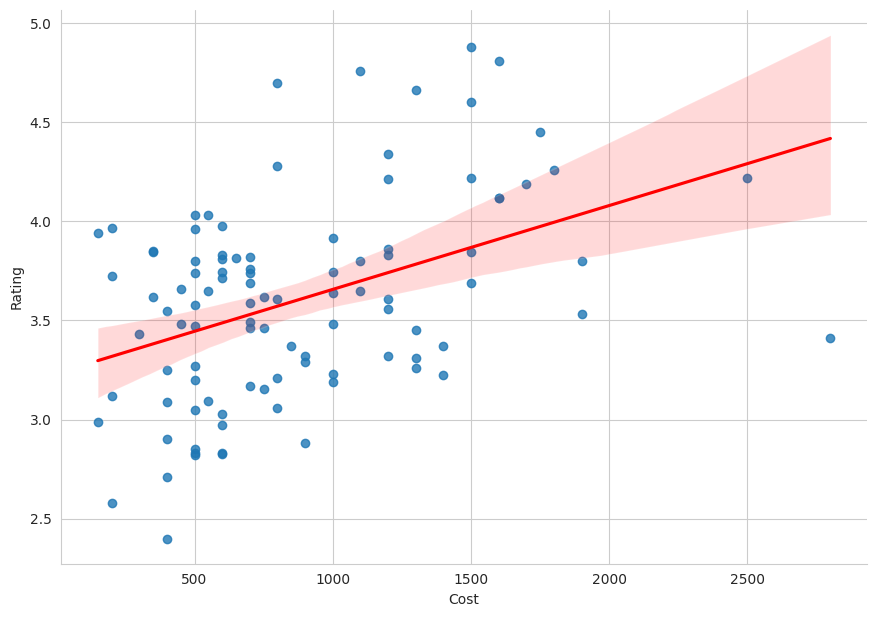

In [131]:
# Visualising relationship between the cost of a meal and the rating of a restaurant
sns.lmplot(y='Rating',x='Cost',data=df_cluster,line_kws={'color' :'red'},height=6.27, aspect=11.7/8.27)

The resulting plot shows the relationship between the cost of a meal and the rating of a restaurant, with the regression line indicating the general trend in the data. This can help identify any patterns or correlations between cost and rating.

# K-means Clustering

In [132]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7fc9566ffd90>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so: cannot open shared object file: No such file or directory


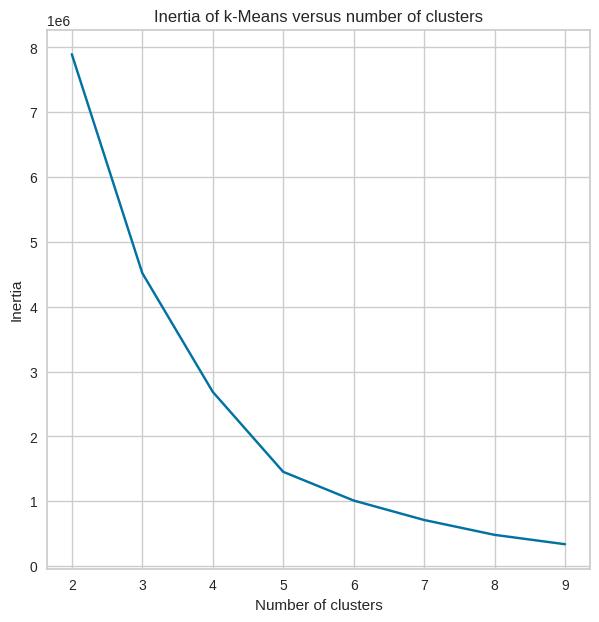

In [133]:
# Create a list of inertia scores for different numbers of clusters
scores = [KMeans(n_clusters=i+2, random_state=11).fit(df_cluster.drop('Name',axis=1)).inertia_
          for i in range(8)]

# Create a line plot of inertia scores versus number of clusters
plt.figure(figsize=(7,7))
sns.lineplot(x=np.arange(2, 10), y=scores)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Inertia of k-Means versus number of clusters')
plt.show()

The plot can help to identify the optimal number of clusters based on the elbow point of the curve, where the rate of decrease in inertia score slows down significantly.

In [134]:
# Initializing a K-Means clustering model with number of clusters and random state.
model = KMeans(random_state=11, n_clusters=5)
model.fit(df_cluster.drop('Name',axis=1))

KMeans(n_clusters=5, random_state=11)

In [135]:
# predict the cluster label of a new data point based on a trained clustering model.
cluster_lbl = model.predict(df_cluster.drop('Name',axis=1))

In [136]:
df_cluster['labels'] = cluster_lbl

In [137]:
# Creating the data frame for each cluster.
cluster_0 = df_cluster[df_cluster['labels'] == 0].reset_index()
cluster_1 = df_cluster[df_cluster['labels'] == 1].reset_index()
cluster_2 = df_cluster[df_cluster['labels'] == 2].reset_index()
cluster_3 = df_cluster[df_cluster['labels'] == 3].reset_index()
cluster_4 = df_cluster[df_cluster['labels'] == 4].reset_index()

In [138]:
list_of_cluster=[cluster_0,cluster_1,cluster_2,cluster_3,cluster_4]

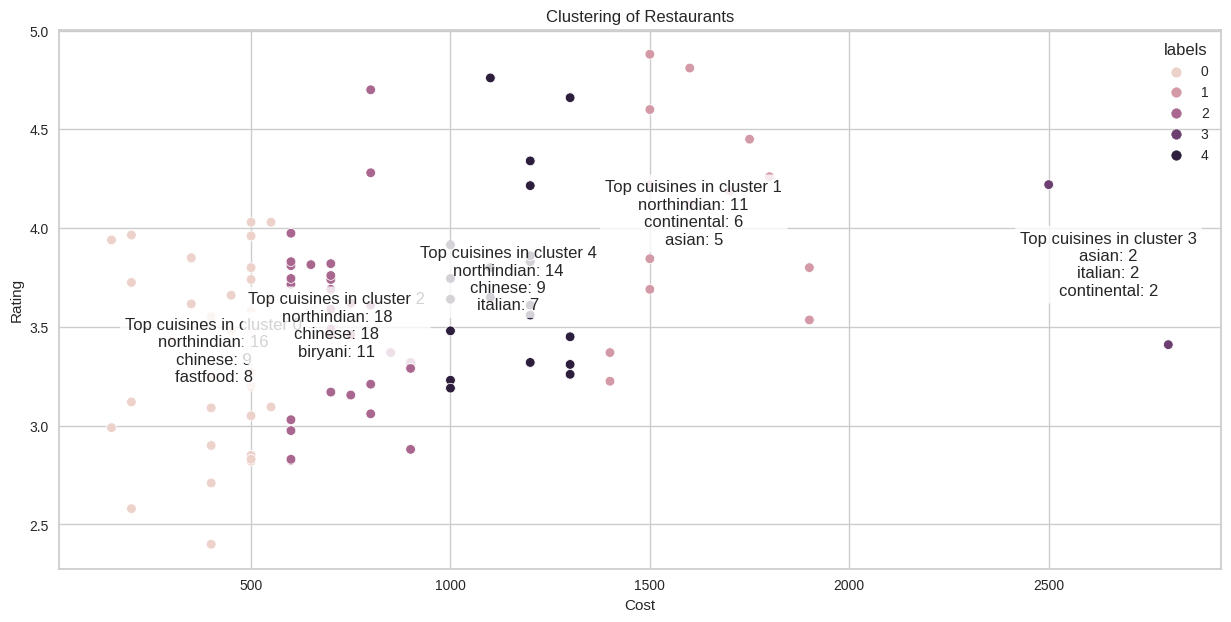

In [139]:
# Create a scatter plot of the clusters with annotations for top cuisines
plt.figure(figsize=(15,7))
sns.scatterplot(x='Cost', y='Rating', hue='labels', data=df_cluster)

# Add annotations for top cuisines in each cluster
for i, df in enumerate(list_of_cluster):
    top_cuisines = df.drop(['index', 'Name', 'Cost', 'Rating', 'labels'], axis=1).sum().sort_values(ascending=False)[:3]
    top_cuisines_str = '\n'.join([f'{cuisine}: {count}' for cuisine, count in top_cuisines.items()])
    plt.annotate(f'Top cuisines in cluster {i}\n{top_cuisines_str}',
                 xy=(df['Cost'].mean(), df['Rating'].mean()),
                 ha='center', va='center', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.xlabel('Cost')
plt.ylabel('Rating')
plt.title('Clustering of Restaurants')
plt.show()


For each cluster, the top three cuisines are identified and annotated on the plot. The annotation includes the name of the cluster, its centroid location (mean cost and mean rating), and the top three cuisines and their counts within the cluster. This plot can be used to visually identify how the restaurants are grouped and the dominant features of each cluster.

In [140]:
# Top cuisines in each cluster
for i,df in enumerate(list_of_cluster):
  print(f'Top cuisines in cluster {i}\n', df.drop(['index','Name','Cost','Rating','labels'],axis=1).sum().sort_values(ascending=False)[:3],'\n')

Top cuisines in cluster 0
 northindian    16
chinese         9
fastfood        8
dtype: int64 

Top cuisines in cluster 1
 northindian    11
continental     6
asian           5
dtype: int64 

Top cuisines in cluster 2
 northindian    18
chinese        18
biryani        11
dtype: int64 

Top cuisines in cluster 3
 asian          2
italian        2
continental    2
dtype: int64 

Top cuisines in cluster 4
 northindian    14
chinese         9
italian         7
dtype: int64 



# **Conclusion**

The project was successful in achieving the goals of clustering and sentiment analysis. The clustering part provided insights into the grouping of restaurants based on their features, which can help in decision making for users and businesses. The sentiment analysis part provided insights into the sentiments expressed by the users in their reviews, which can help businesses in improving their services and user experience.

There are several potential areas for future work, such as implementing more advanced clustering algorithms and sentiment analysis techniques, incorporating more features such as images and menus of the restaurants, and exploring the relationships between the clustering and sentiment analysis results.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***